# Laboratory work #1

Analysis of univariate random variables

NOTE. For this lab you need subsample with ***3-5 random variables***, at least half of them should be described with continuous random variable type.

Step 1. Choose subsample with main variables for your further analysis. Then for each of them:

Step 2. You need to make a non-parametric estimation of PDF (Probability density function) in form of histogram and using kernel density function (or probability law in case of discrete RV).

Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

Step 6. Validate your estimated parameters using QQ biplots.

Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

## Step 1. Choose subsample with main variables for your further analysis. Then for each of them:


In [23]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
filepath = r'spotify_dataset.csv'

data = pd.read_csv(filepath)
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [25]:
data.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [26]:
# variables = ['Index', 'Highest Charting Position', 'Number of Times Charted',
#        'Streams',  'Artist Followers',
#        'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
#        'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
#        'Chord']
variables = 'Danceability	Energy	Loudness	Valence'
variables = variables.split()

N = len(data)
subdata = data[variables]
subdata = subdata[:N]
subdata

,Danceability,Energy,Loudness,Valence
0,0.714,0.8,-4.808,0.589
1,0.591,0.764,-5.484,0.478
2,0.563,0.664,-5.044,0.688
3,0.808,0.897,-3.712,0.591
4,0.736,0.704,-7.409,0.894
...,...,...,...,...
1551,0.762,0.7,-6.021,0.608
1552,0.528,0.87,-3.123,0.714
1553,0.765,0.523,-4.333,0.394
1554,0.832,0.55,-7.026,0.881


In [27]:
# mylist = list(subdata['Chord'])

# used = set()
# unique = [x for x in mylist if x not in used and (used.add(x) or True)]
# print(len(unique))

In [28]:
for col in subdata.columns:
    subdata[col] = pd.to_numeric(subdata[col], errors='coerce')
    subdata[col].fillna(subdata[col].mean(), inplace=True, downcast='infer')
subdata.dtypes

Danceability    float64
Energy          float64
Loudness        float64
Valence         float64
dtype: object

## Step 2. You need to make a non-parametric estimation of PDF (Probability density function) in form of histogram and using kernel density function (or probability law in case of discrete RV).


<ipython-input-29-accbc6b8487e>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-29-accbc6b8487e>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',


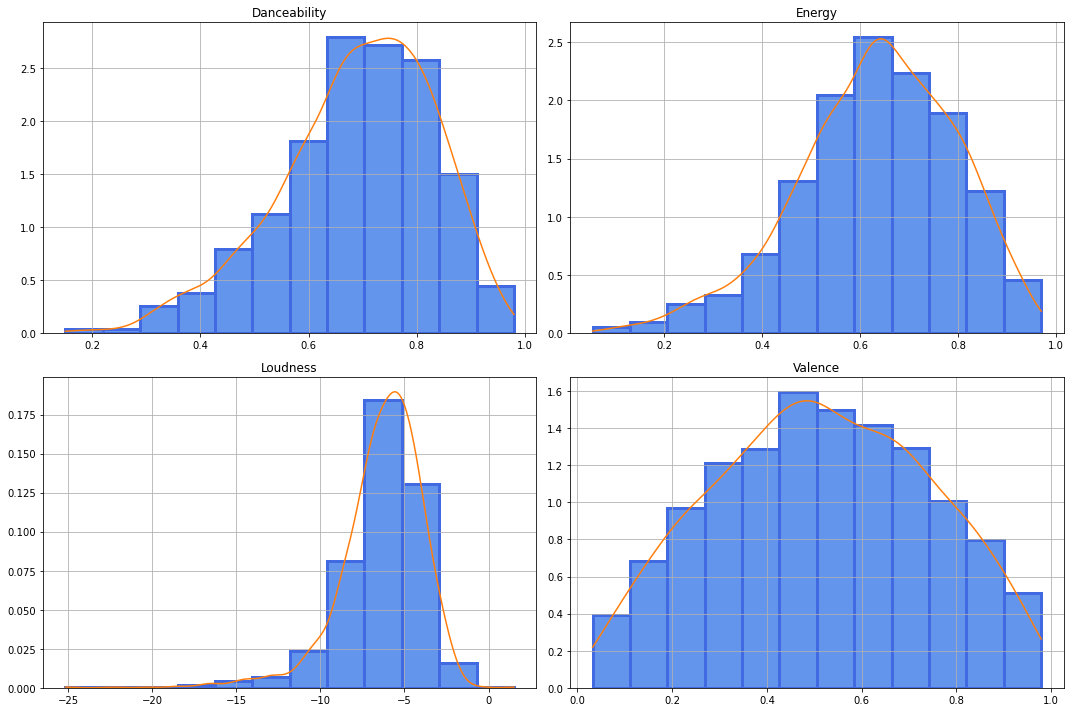

In [29]:
m = 1 + 3.32*np.log10(N)
m = int(np.round(m))

plt.figure(figsize=(15,10))

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    kernel = scipy.stats.gaussian_kde(subdata[col])
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    kde_values = kernel(x)
    
    plt.subplot(cols,N_cols-cols,i+1)
    subdata[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)
    plt.plot(x,kde_values)
    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

       Danceability       Energy     Loudness      Valence
count   1556.000000  1556.000000  1556.000000  1556.000000
mean       0.689997     0.633495    -6.348474     0.514704
std        0.141939     0.161004     2.500390     0.226520
min        0.150000     0.054000   -25.166000     0.032000
25%        0.599750     0.533750    -7.481500     0.344000
50%        0.703500     0.641000    -6.013500     0.514704
75%        0.795000     0.750000    -4.718500     0.690000
max        0.980000     0.970000     1.509000     0.979000


<ipython-input-30-887e1dc7f115>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-30-887e1dc7f115>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',


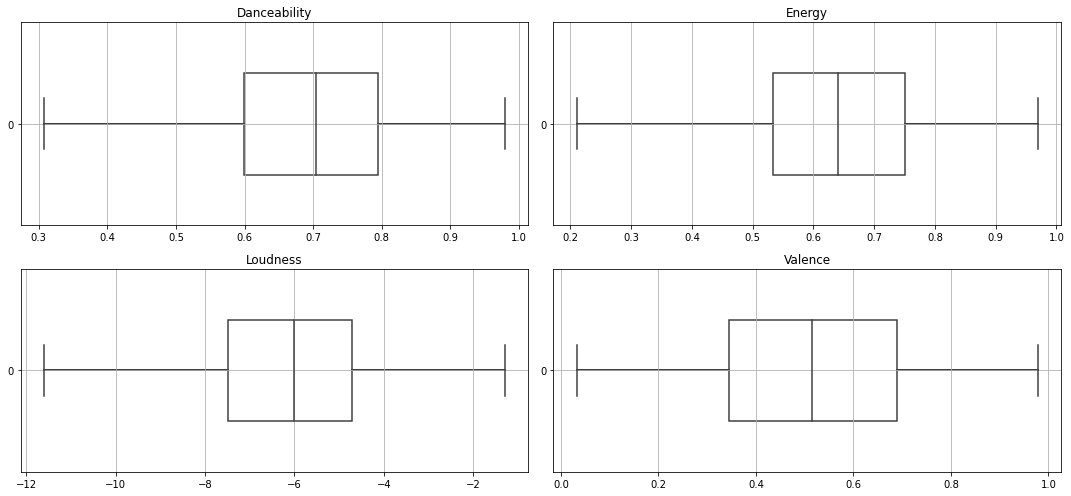

In [30]:
print(subdata.describe())

plt.figure(figsize=(15,7))

N_cols = len(subdata.columns)
cols = 2
for i, col in enumerate(subdata.columns):
    kernel = scipy.stats.gaussian_kde(subdata[col])
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    kde_values = kernel(x)
    
    plt.subplot(cols,N_cols-cols,i+1)
    ax=sns.boxplot(data = subdata[col], width = .5, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":1},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":1},\
               saturation = 1, orient = 'h')
#     subdata[col].hist(density=True)
#     plt.plot(x,kde_values)
#     plt.gca().invert_yaxis()

    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.


In [31]:
from scipy.stats.distributions import norm, rayleigh, gumbel_l, gumbel_r
distributions = [norm, rayleigh, gumbel_l, gumbel_r]

## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.


<ipython-input-32-14f679683904>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./3.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-32-14f679683904>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./3.png", dpi=300, facecolor='w', edgecolor='w',


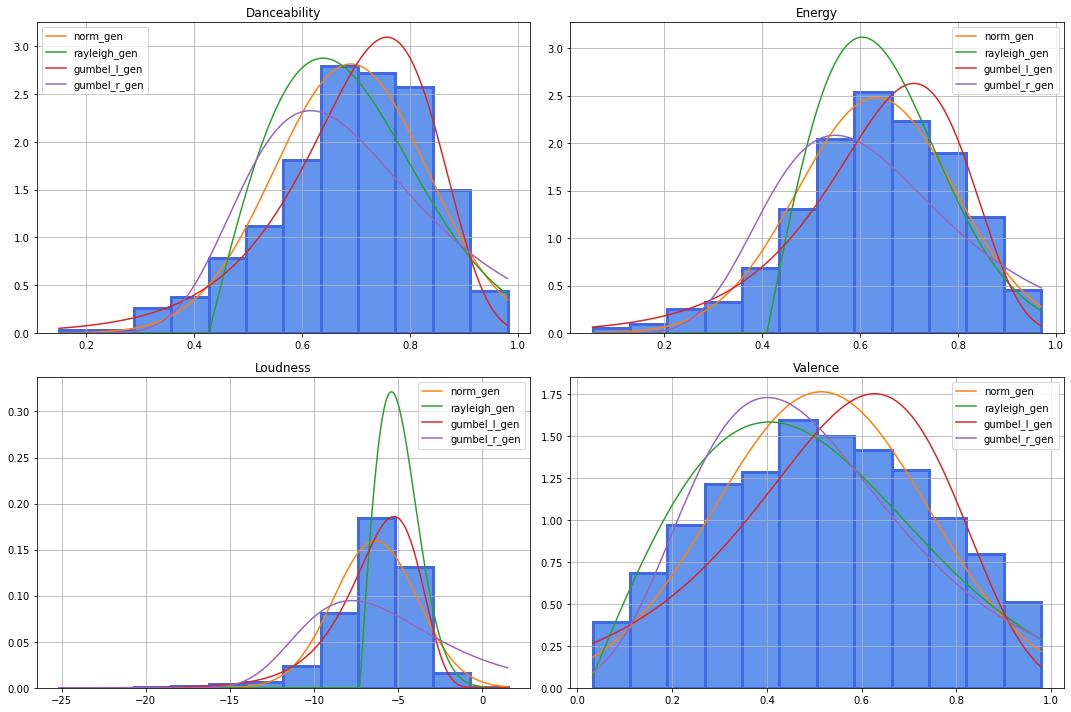

In [32]:
# MLE estimations

plt.figure(figsize=(15,10))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i, col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    subdata[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)

    for dist in distributions:
        MLE_params = dist.fit(subdata[col])
        vals = dist.pdf(x,*MLE_params)
        plt.plot(x,vals,label=dist.__class__.__name__)

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./3.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

<ipython-input-33-cb3259b07b69>:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./4.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-33-cb3259b07b69>:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./4.png", dpi=300, facecolor='w', edgecolor='w',


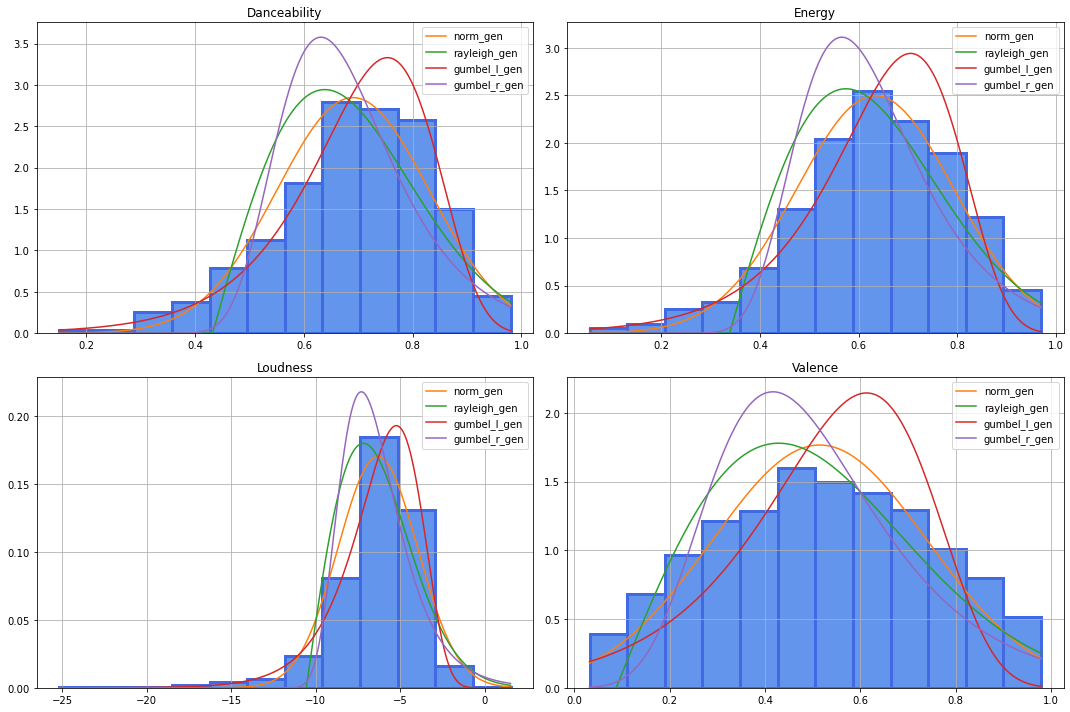

In [33]:
# LSM estimations

plt.figure(figsize=(15,10))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    subdata[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)

    for dist in distributions:
        L = len(subdata[col])
        quantile = subdata[col]
        probability = np.linspace(1e-3,0.999,L) 
        quantile = np.quantile(subdata[col],probability)
        Upk = dist.ppf(probability)
        L = len(probability)
        sumUpk = np.sum(Upk)
        sumUpk2 = np.sum(Upk**2)
        A = np.array([[L, sumUpk],[sumUpk, sumUpk2]])
        b = [np.sum(quantile), np.sum(Upk*quantile)]
        
        LSM_params = np.linalg.solve(A,b)
#         xx = subdata[col]
#         hist, bins = np.histogram(x, density=True)
#         centers = (0.5*(bins[1:]+bins[:-1]))
#         LSM_params, cov = curve_fit(lambda xx, mu, sig : dist.pdf(xx, loc=mu, scale=sig), centers, hist)
        
        vals = dist.pdf(x,*LSM_params)
        plt.plot(x,vals,label=dist.__class__.__name__)
    

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./4.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



## Step 6. Validate your estimated parameters using QQ biplots.


<ipython-input-34-d16502211d6a>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./5.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-34-d16502211d6a>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./5.png", dpi=300, facecolor='w', edgecolor='w',


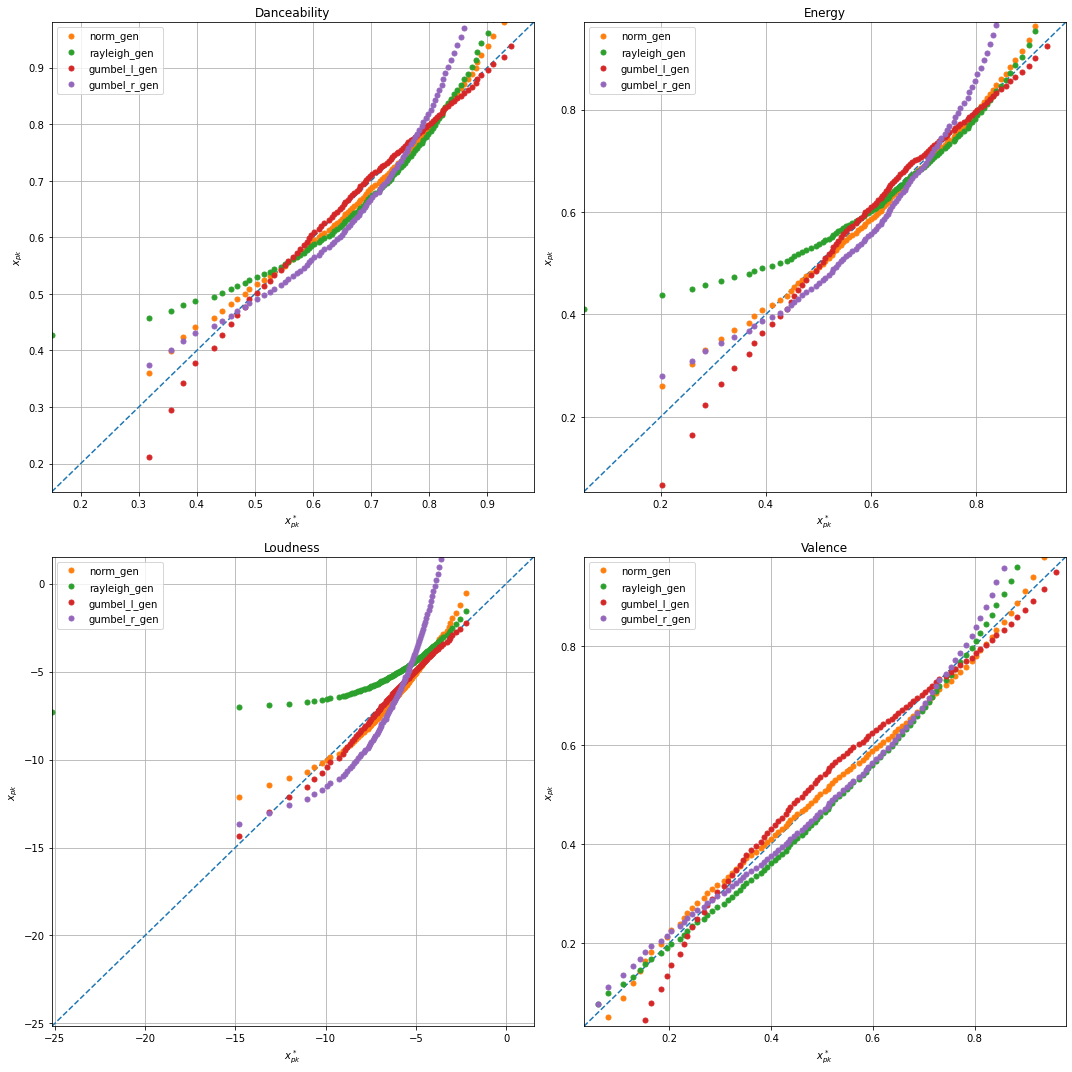

In [34]:
# MLE estimations

plt.figure(figsize=(15,15))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    plt.plot(x, x, ls="--")
    for dist in distributions:
        percs = np.linspace(0, 100, 100)

        MLE_params = dist.fit(subdata[col])
        vals1 = dist.pdf(x,*MLE_params)
        q1 = np.percentile(subdata[col], percs)
        
        q_dist = dist.ppf(percs / 100.0, *MLE_params)
        
        plt.plot(q1, q_dist, ls="", marker="o", markersize=5,label=dist.__class__.__name__)
        plt.xlim(np.min(x),np.max(x))
        plt.ylim(np.min(x),np.max(x))

    plt.xlabel('$x_{pk}^*$')
    plt.ylabel('$x_{pk}$')
    

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./5.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



<ipython-input-35-4daeeaf16219>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-35-4daeeaf16219>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',


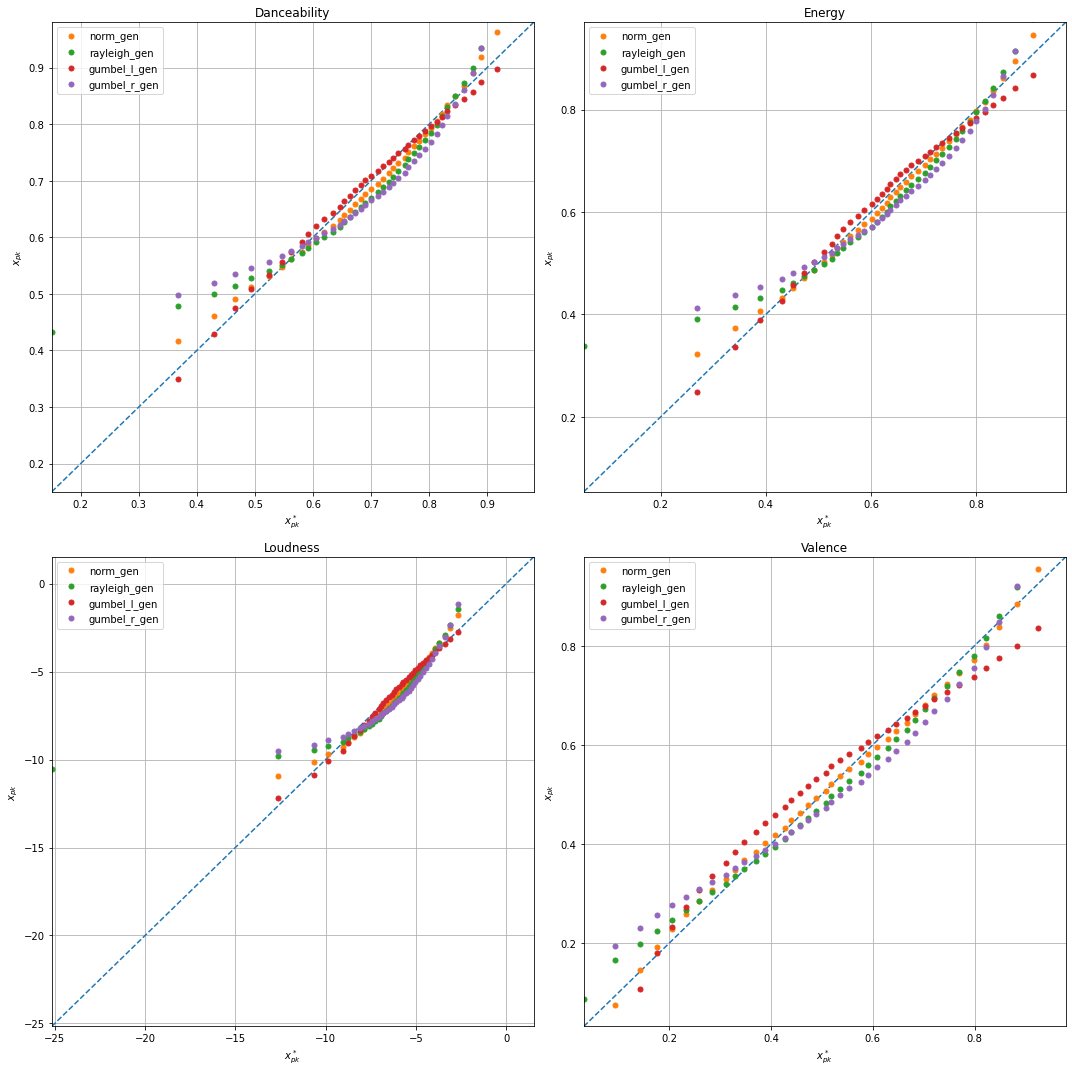

In [35]:
from scipy.optimize import curve_fit
# LSM estimations

plt.figure(figsize=(15,15))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    plt.plot(x, x, ls="--")

    for dist in distributions:
        L = len(subdata[col])
        quantile = subdata[col]
        probability = np.linspace(1e-3,0.999,L) 
        quantile = np.quantile(subdata[col],probability)
        Upk = dist.ppf(probability)
        L = len(probability)
        sumUpk = np.sum(Upk)
        sumUpk2 = np.sum(Upk**2)
        A = np.array([[L, sumUpk],[sumUpk, sumUpk2]])
        b = [np.sum(quantile), np.sum(Upk*quantile)]
        percs = np.linspace(0, 100, 40)
        LSM_params = np.linalg.solve(A,b)
#         xx = subdata[col]
#         hist, bins = np.histogram(xx, density=True)
#         centers = (0.5*(bins[1:]+bins[:-1]))
#         LSM_params, cov = curve_fit(lambda xx, mu, sig : dist.pdf(xx, loc=mu, scale=sig), centers, hist)
        
        vals1 = dist.pdf(x,*LSM_params)
        q1 = np.percentile(subdata[col], percs)
        
        q_dist = dist.ppf(percs / 100.0, *LSM_params)

        plt.plot(q1, q_dist, ls="", marker="o", markersize=5,label=dist.__class__.__name__)
        
        plt.xlim(np.min(x),np.max(x))
        plt.ylim(np.min(x),np.max(x))

    plt.xlabel('$x_{pk}^*$')
    plt.ylabel('$x_{pk}$')
    

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



## Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

In [56]:
from scipy.stats import kstest, cramervonmises

# MLE estimations

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]
testik_MLE = []
N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    print(f'--------Parameter: \"{col}\"')
    print()
    for dist in distributions:
        MLE_params = dist.fit(subdata[col])
#         vals1 = dist.pdf(x,*MLE_params)
        d = dist.__class__.__name__
        d = d[:-4]
        ks_res = kstest(subdata[col], d, MLE_params)
        cvm_res = cramervonmises(subdata[col], d, MLE_params)
        
 
        alfa = 0.01
        print(f'---Distribution \"{d}\"')
        print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alfa else 'Not passed')
        print(cvm_res,'\t<----------- ', 'Passed' if cvm_res.pvalue > alfa else 'Not passed') 
        print('-----------------------------------')
        
        if ks_res.pvalue > alfa:
            testik_MLE.append(True)
        else:
            testik_MLE.append(False)
    print('-----------------------------------\n')




--------Parameter: "Danceability"

---Distribution "norm"
KstestResult(statistic=0.05071641110260827, pvalue=0.0006434475261468713) 	<-----------  Not passed
CramerVonMisesResult(statistic=1.392357519697149, pvalue=0.0003029035818076231) 	<-----------  Not passed
-----------------------------------
---Distribution "rayleigh"
KstestResult(statistic=0.08647811853865328, pvalue=1.4229552203378694e-10) 	<-----------  Not passed
CramerVonMisesResult(statistic=4.6215403832710535, pvalue=2.7590152384959765e-11) 	<-----------  Not passed
-----------------------------------
---Distribution "gumbel_l"
KstestResult(statistic=0.031892265054483726, pvalue=0.08260213827706364) 	<-----------  Passed
CramerVonMisesResult(statistic=0.2252496171544766, pvalue=0.22346705011542234) 	<-----------  Passed
-----------------------------------
---Distribution "gumbel_r"
KstestResult(statistic=0.11440720508322078, pvalue=3.375855746894599e-18) 	<-----------  Not passed
CramerVonMisesResult(statistic=7.413732310

In [57]:
from scipy.stats import kstest, cramervonmises

# LSM estimations

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]
testik_LSM = []


N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    print(f'--------Parameter: \"{col}\"')
    print()
    for dist in distributions:
        L = len(subdata[col])
        quantile = subdata[col]
        probability = np.linspace(1e-3,0.999,L) 
        quantile = np.quantile(subdata[col],probability)
        Upk = dist.ppf(probability)
        L = len(probability)
        sumUpk = np.sum(Upk)
        sumUpk2 = np.sum(Upk**2)
        A = np.array([[L, sumUpk],[sumUpk, sumUpk2]])
        b = [np.sum(quantile), np.sum(Upk*quantile)]        
        LSM_params = np.linalg.solve(A,b)

#         xx = subdata[col]
#         hist, bins = np.histogram(xx, density=True)
#         centers = (0.5*(bins[1:]+bins[:-1]))
#         LSM_params, cov = curve_fit(lambda xx, mu, sig : dist.pdf(xx, loc=mu, scale=sig), centers, hist)

        d = dist.__class__.__name__
        d = d[:-4]
        ks_res = kstest(subdata[col], d, LSM_params,N=100)
        cvm_res = cramervonmises(subdata[col], d, LSM_params)
        
        alfa = 0.01
        print(f'---Distribution \"{d}\"')
        print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alfa else 'Not passed')
        print(cvm_res,'\t<----------- ', 'Passed' if cvm_res.pvalue > alfa else 'Not passed') 


        if ks_res.pvalue > alfa:
            testik_LSM.append(True)
        else:
            testik_LSM.append(False)
        print('-----------------------------------')
    print('-----------------------------------\n')




--------Parameter: "Danceability"

---Distribution "norm"
KstestResult(statistic=0.05143577510930042, pvalue=0.0005115486457462256) 	<-----------  Not passed
CramerVonMisesResult(statistic=1.377404238936946, pvalue=0.00032778951558232183) 	<-----------  Not passed
-----------------------------------
---Distribution "rayleigh"
KstestResult(statistic=0.09005360211694813, pvalue=1.9780354601497775e-11) 	<-----------  Not passed
CramerVonMisesResult(statistic=5.07066324714056, pvalue=6.307054878362806e-11) 	<-----------  Not passed
-----------------------------------
---Distribution "gumbel_l"
KstestResult(statistic=0.03557384561397964, pvalue=0.038030765334215344) 	<-----------  Passed
CramerVonMisesResult(statistic=0.5985604628334359, pvalue=0.022553560123602212) 	<-----------  Passed
-----------------------------------
---Distribution "gumbel_r"
KstestResult(statistic=0.12184956742520492, pvalue=1.3653016290794118e-20) 	<-----------  Not passed
CramerVonMisesResult(statistic=8.700421120

<ipython-input-59-8ede3a97139c>:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-59-8ede3a97139c>:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',


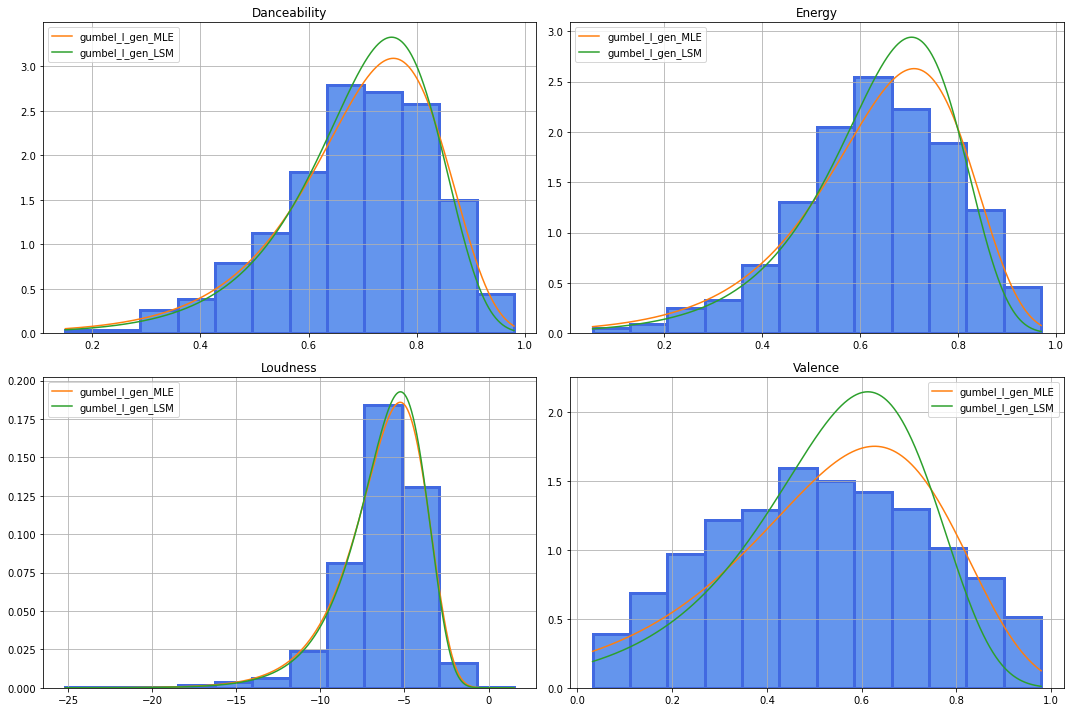

In [59]:
# LSM estimations

plt.figure(figsize=(15,10))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    subdata[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)

    for j,dist in enumerate(distributions):
        if testik_MLE[j] == True:
            MLE_params = dist.fit(subdata[col])
            vals = dist.pdf(x,*MLE_params)
            plt.plot(x,vals,label=dist.__class__.__name__+'_MLE')

        if testik_LSM[j] == True:
            L = len(subdata[col])
            quantile = subdata[col]
            probability = np.linspace(1e-3,0.999,L) 
            quantile = np.quantile(subdata[col],probability)
            Upk = dist.ppf(probability)
            L = len(probability)
            sumUpk = np.sum(Upk)
            sumUpk2 = np.sum(Upk**2)
            A = np.array([[L, sumUpk],[sumUpk, sumUpk2]])
            b = [np.sum(quantile), np.sum(Upk*quantile)]
            
            LSM_params = np.linalg.solve(A,b)
    #         xx = subdata[col]
    #         hist, bins = np.histogram(x, density=True)
    #         centers = (0.5*(bins[1:]+bins[:-1]))
    #         LSM_params, cov = curve_fit(lambda xx, mu, sig : dist.pdf(xx, loc=mu, scale=sig), centers, hist)
            
            vals = dist.pdf(x,*LSM_params)
            plt.plot(x,vals,label=dist.__class__.__name__+'_LSM')
    

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



<ipython-input-58-10de98d0bfc4>:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./7.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-58-10de98d0bfc4>:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "./7.png", dpi=300, facecolor='w', edgecolor='w',


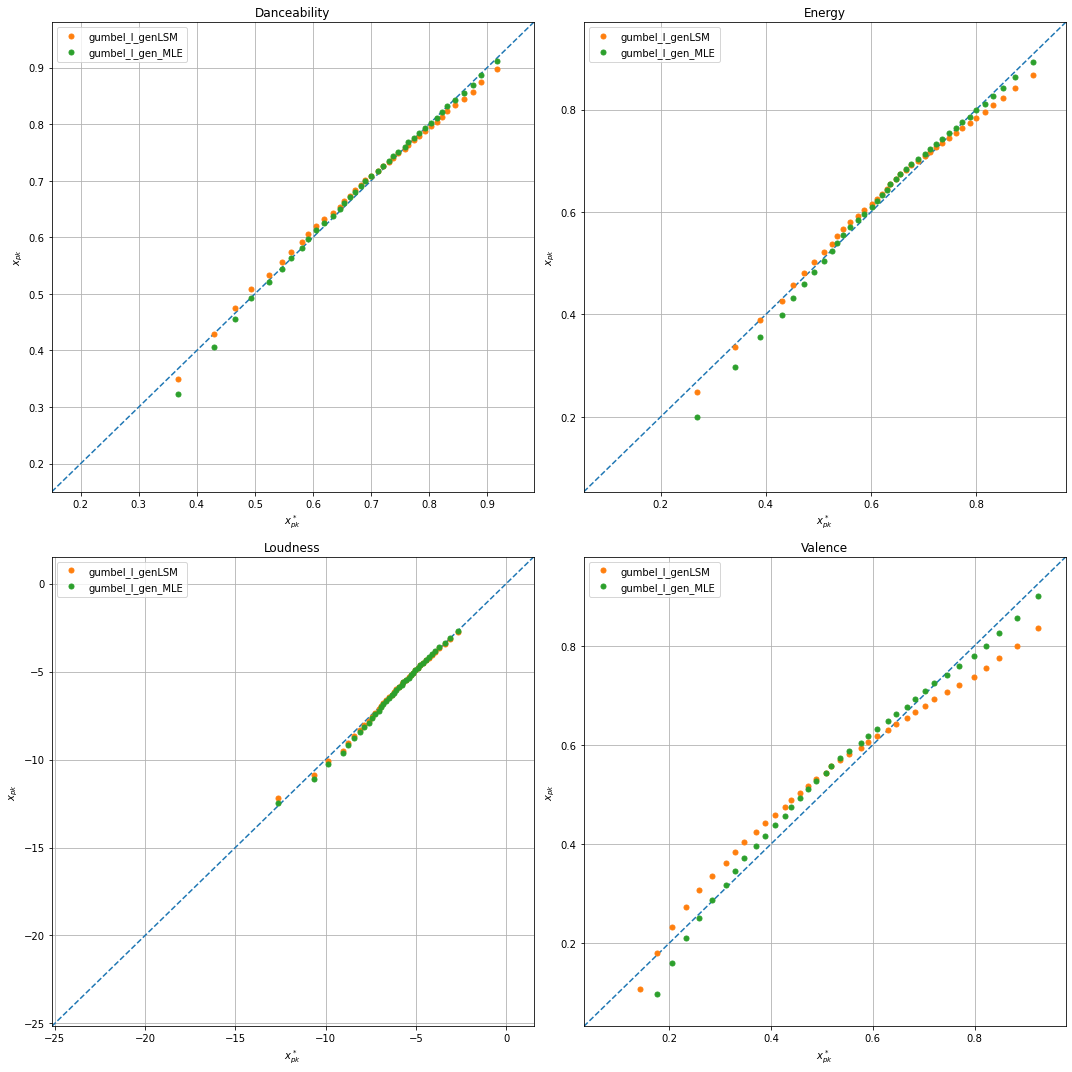

In [58]:
from scipy.optimize import curve_fit
# LSM estimations

plt.figure(figsize=(15,15))

# distributions = [norm, expon, rayleigh, gumbel_l, gumbel_r]

N_cols = len(subdata.columns)
cols = 2
for i,col in enumerate(subdata.columns):
    min_amount, max_amount = subdata[col].min(), subdata[col].max()
    x = np.linspace(min_amount, max_amount, len(subdata[col]))
    
    plt.subplot(cols,N_cols-cols,i+1)
    plt.plot(x, x, ls="--")

    for j,dist in enumerate(distributions):
        if testik_LSM[j] == True:
            L = len(subdata[col])
            quantile = subdata[col]
            probability = np.linspace(1e-3,0.999,L) 
            quantile = np.quantile(subdata[col],probability)
            Upk = dist.ppf(probability)
            L = len(probability)
            sumUpk = np.sum(Upk)
            sumUpk2 = np.sum(Upk**2)
            A = np.array([[L, sumUpk],[sumUpk, sumUpk2]])
            b = [np.sum(quantile), np.sum(Upk*quantile)]
            percs = np.linspace(0, 100, 40)
            LSM_params = np.linalg.solve(A,b)
    #         xx = subdata[col]
    #         hist, bins = np.histogram(xx, density=True)
    #         centers = (0.5*(bins[1:]+bins[:-1]))
    #         LSM_params, cov = curve_fit(lambda xx, mu, sig : dist.pdf(xx, loc=mu, scale=sig), centers, hist)
            
            vals1 = dist.pdf(x,*LSM_params)
            q1 = np.percentile(subdata[col], percs)
            
            q_dist = dist.ppf(percs / 100.0, *LSM_params)

            plt.plot(q1, q_dist, ls="", marker="o", markersize=5,label=dist.__class__.__name__+'LSM')
            
        
        if testik_MLE[j] == True:
            MLE_params = dist.fit(subdata[col])
            vals1 = dist.pdf(x,*MLE_params)
            q1 = np.percentile(subdata[col], percs)
            
            q_dist = dist.ppf(percs / 100.0, *MLE_params)
            
            plt.plot(q1, q_dist, ls="", marker="o", markersize=5,label=dist.__class__.__name__+'_MLE')
        plt.xlim(np.min(x),np.max(x))
        plt.ylim(np.min(x),np.max(x))

    plt.xlabel('$x_{pk}^*$')
    plt.ylabel('$x_{pk}$')
    

    plt.grid(True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.savefig(fname = "./7.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

